In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data Path
DATA_FOLDER = 'Data/'

PLOT_DATASET = DATA_FOLDER+"plot_summaries.txt"
CHARACTER_DATASET = DATA_FOLDER+"character.metadata.tsv"
MOVIE_DATASET = DATA_FOLDER+"movie.metadata.tsv"

# Test dataset in the original study
NAME_DATASET = DATA_FOLDER+"name.clusters.txt"
TVTROPES_DATASET = DATA_FOLDER+"tvtropes.clusters.txt"

In [2]:
#plot = pd.read_csv(PLOT_DATASET)
##### Loading characters data #####
character = pd.read_csv(CHARACTER_DATASET, sep = '\t', header = None)
# Assign columns' names
character.columns = ['WikiMovie_ID', 'FMovie_ID', 'Release_date', 'Character_name', 
                           'Actor_dob', 'Actor_gender', 'Actor_height', 'Actor_ethnicity',
                           'Actor_name', 'Actor_age', 'Map_ID', 
                           'FCharacter_ID', 'FActor_ID']
# Extract freebase movie ID
fmovie_id = character['FMovie_ID'].str.extract('/m/(\w+)$').fillna('NaN')
character['FMovie_ID'] = fmovie_id
# Extract freebase actor ethnicity ID
Actor_ethnicity = character['Actor_ethnicity'].str.extract('/m/(\w+)$').fillna('NaN')
character['Actor_ethnicity'] = Actor_ethnicity
# Extract character/actor map ID
Map = character['Map_ID'].str.extract('/m/(\w+)$').fillna('NaN')
character['Map_ID'] = Map
# Extract freebase character ID
FCharacter_ID = character['FCharacter_ID'].str.extract('/m/(\w+)$').fillna('NaN')
character['FCharacter_ID'] =FCharacter_ID
# Extract freebase actor ID
FActor_ID = character['FActor_ID'].str.extract('/m/(\w+)$').fillna('NaN')
character['FActor_ID'] = FActor_ID

# Display the dataframe
character.head()

,WikiMovie_ID,FMovie_ID,Release_date,Character_name,Actor_dob,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age,Map_ID,FCharacter_ID,FActor_ID
0,975900,03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,0bgchxw,0bgcj3x,03wcfv7
1,975900,03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,044038p,Natasha Henstridge,27.0,0jys3m,0bgchn4,0346l4
2,975900,03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,0x67,Ice Cube,32.0,0jys3g,0bgchn_,01vw26l
3,975900,03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,02vchl6,0bgchnq,034hyc
4,975900,03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,02vbb3r,0bgchp9,01y9xg


In [3]:
##### Loading movie data ######
movie = pd.read_csv(MOVIE_DATASET, sep='\t', header = None)

# Assign columns' names
movie.columns = ['WikiMovie_ID', 'FMovie_ID', 'Movie_name', 'Release_date', 
                    'Revenue', 'Runtime', 'Languages', 'Countries','Genres']
# Extract freebase movie ID
FMovie_ID = movie['FMovie_ID'].str.extract('/m/(\w+)$').fillna('NaN')
movie['FMovie_ID'] = FMovie_ID

# Extract movie language 
Language = movie['Languages'].str.extract('{"/m/\w+": "(\w+) Language"}').fillna('NaN')
movie['Languages'] = Language

# Extract movie country
Countries = movie['Countries'].str.extract('{"/m/\w+": "([^"]+)"}').fillna('NaN')
movie['Countries'] = Countries

# Create a pattern for genres
pattern = r'":\s*"([^"]+)"'
# Extract genres
genres = movie['Genres'].str.extractall(pattern)
# Group by the first level of the MultiIndex (level=0)
grouped_result = genres.groupby(level=0)
# Join the genres of a film
movie['Genres'] = grouped_result[0].apply(lambda x: ', '.join(x))

movie.head()

,WikiMovie_ID,FMovie_ID,Movie_name,Release_date,Revenue,Runtime,Languages,Countries,Genres
0,975900,03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English,United States of America,"Thriller, Science Fiction, Horror, Adventure, ..."
1,3196793,08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
2,28463795,0crgdbh,Brun bitter,1988,NaN,83.0,Norwegian,Norway,"Crime Fiction, Drama"
3,9363483,0285_cd,White Of The Eye,1987,NaN,110.0,English,United Kingdom,"Thriller, Erotic thriller, Psychological thriller"
4,261236,01mrr1,A Woman in Flames,1983,NaN,106.0,German,Germany,Drama


In [4]:
# Revenue Missing Rate
Revenue_MR = movie['Revenue'].isna().sum() / len(movie['Revenue'])
Revenue_MR

0.8972241592346558

In [5]:
# Load character name dataset
name = pd.read_csv(NAME_DATASET, sep='\t',header = None)
name.columns = ['Character_name', 'Map_ID']
# Extract character/actor map ID
Map = name['Map_ID'].str.extract('/m/(\w+)$').fillna('NaN')
name['Map_ID'] = Map

name.head()

,Character_name,Map_ID
0,Stuart Little,0k3w9c
1,Stuart Little,0k3wcx
2,Stuart Little,0k3wbn
3,John Doe,0jyg35
4,John Doe,0k2_zn


In [6]:
# Load tvtropes.com dataset
tvtropes = pd.read_csv(TVTROPES_DATASET, sep='\t',header = None)
# Extract character name, movie name, actor name, and character/actor map
tvtropes['Character'] = tvtropes.iloc[:,1].str.extract('"char":\s*"([^"]+)"').fillna('NaN')
tvtropes['movie'] = tvtropes.iloc[:,1].str.extract('"movie":\s*"([^"]+)"').fillna('NaN')
tvtropes['Map'] = tvtropes.iloc[:,1].str.extract('"id":\s*"/m/([^"]+)"').fillna('NaN')
tvtropes['Actor_name'] = tvtropes.iloc[:,1].str.extract('"actor":\s*"([^"]+)"').fillna('NaN')
# Rename character type column and clean original dataframe
tvtropes.rename(columns = {0:'Character_type'},inplace=True)
tvtropes.drop(columns = 1, inplace = True)

tvtropes.head()

,Character_type,Character,movie,Map,Actor_name
0,absent_minded_professor,Professor Philip Brainard,Flubber,0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,0k3rhh,James Spader


In [7]:
tvtropes_character = pd.merge(tvtropes, character, 
                              left_on=['Map', 'Character', 'Actor_name'], 
                              right_on=['Map_ID', 'Character_name', 'Actor_name'], how='left')
tvtropes_character.drop(columns=['Map_ID', 'Character_name'], inplace=True)
tvtropes_character.head()

,Character_type,Character,movie,Map,Actor_name,WikiMovie_ID,FMovie_ID,Release_date,Actor_dob,Actor_gender,Actor_height,Actor_ethnicity,Actor_age,FCharacter_ID,FActor_ID
0,absent_minded_professor,Professor Philip Brainard,Flubber,0jy9q0,Robin Williams,1344253.0,04vcfx,1997-11-26,1951-07-21,M,1.702,NaN,46.0,0cls20k,0dzf_
1,absent_minded_professor,Professor Keenbean,Richie Rich,02vchl3,Michael McShane,1486573.0,0557n3,1994-12-21,1955-06-25,M,NaN,NaN,39.0,0h6dygh,05tkfc
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,0k6fkc,Ian McKellen,5991505.0,0fjjjh,1994-07-01,1939-05-25,M,1.800,NaN,55.0,0gynqd6,03ym1
3,absent_minded_professor,Dr. Harold Medford,Them!,0k6_br,Edmund Gwenn,605676.0,02vt5c,1954-06-16,1877-09-26,M,NaN,NaN,NaN,0h5whpq,03bpcj
4,absent_minded_professor,Daniel Jackson,Stargate,0k3rhh,James Spader,28327.0,070g7,1994-10-28,1960-02-07,M,1.780,NaN,34.0,02qs1z,043js


In [8]:
# Group by character type
tvt_char_grouped = tvtropes_character.groupby('Character_type').count().Character
# For each type, sort by number of charaters
tvt_char_grouped_sorted = tvt_char_grouped.sort_values(ascending=False)
# Display the top 5
typical_char = tvt_char_grouped_sorted.head(10)

In [9]:
# filter the dataframe 'tvtropes_character' using the typical character type filter
tvtropes_character_filtered = tvtropes_character[tvtropes_character['Character_type'].isin(typical_char.index)]
# Keep only actor age and actor height for analysis
tvtropes_character_filtered = tvtropes_character_filtered[['Character_type', 'Character', 'movie', 'Release_date','Actor_name', 'Actor_gender', 'Actor_age', 'Actor_height', 'Actor_ethnicity']]
display(tvtropes_character_filtered)


,Character_type,Character,movie,Release_date,Actor_name,Actor_gender,Actor_age,Actor_height,Actor_ethnicity
35,brainless_beauty,Gemma Honeycutt,Fool's Gold,2008-02-07,Alexis Dziena,F,23.0,1.57,0xnvg
36,brainless_beauty,Matt Mateo,The Opposite of Sex,1998-05-22,Ivan Sergei,M,27.0,1.88,NaN
37,brainless_beauty,Paul Metzler,Election,1999-04-23,Chris Klein,M,20.0,1.85,07hwkr
38,brainless_beauty,Shelley Darlingson,The House Bunny,2008-08-22,Anna Faris,F,31.0,1.65,07bch9
39,brainless_beauty,Brace Channing,My Favorite Martian,1999-02-12,Elizabeth Hurley,F,33.0,1.73,02w7gg
...,...,...,...,...,...,...,...,...,...
440,stoner,Red,Pineapple Express,2008-08-06,Danny McBride,M,31.0,1.78,03bkbh
441,stoner,Saul Silver,Pineapple Express,2008-08-06,James Franco,M,30.0,1.78,048z7l
442,stoner,Thadeous,Your Highness,2011-04-08,Danny McBride,M,34.0,1.78,03bkbh
443,stoner,Fabious,Your Highness,2011-04-08,James Franco,M,32.0,1.78,048z7l


In [10]:
# Group by character type
tvtropes_character_filtered['Release_year'] = tvtropes_character_filtered['Release_date'].str.extract('(\d{4})').fillna(0).astype(int)
tvtropes_character_filtered_grouped = tvtropes_character_filtered.groupby('Character_type')
# Sort by release date within group
tvtropes_character_filtered_bygroup = tvtropes_character_filtered_grouped.apply(lambda x: x.sort_values('Release_date'))
display(tvtropes_character_filtered_bygroup)

Character_type       Character  \
Character_type                                           
brainless_beauty 42   brainless_beauty           Chris   
                 43   brainless_beauty   Buffy Summers   
                 41   brainless_beauty    Marcia Brady   
                 36   brainless_beauty      Matt Mateo   
                 39   brainless_beauty  Brace Channing   
...                                ...             ...   
stoner           441            stoner     Saul Silver   
                 442            stoner        Thadeous   
                 443            stoner         Fabious   
                 444            stoner  Marty Mikalski   
                 434            stoner           Ted \   

                                                 movie Release_date  \
Character_type                                                        
brainless_beauty 42                            Roxanne   1987-06-19   
                 43           Buffy the Vampire Slayer   1992-07-31   
                 41              The Brady Bunch Movie   1995-02-17   
                 36                The Opposite of Sex   1998-05-22   
                 39                My Favorite Martian   1999-02-12   
...                                                ...          ...   
stoner           441                 Pineapple Express   2008-08-06   
                 442                     Your Highness   2011-04-08   
                 443                     Your Highness   2011-04-08   
                 444            The Cabin in the Woods   2011-12-10   
                 434  Bill & Ted's Excellent Adventure          NaN   

                            Actor_name Actor_gender  Actor_age  Actor_height  \
Character_type                                                                 
brainless_beauty 42     Rick Rossovich            M       29.0         1.930   
                 43     Kristy Swanson            F       22.0         1.676   
                 41   Christine Taylor            F       23.0         1.689   
                 36        Ivan Sergei            M       27.0         1.880   
                 39   Elizabeth Hurley            F       33.0         1.730   
...                                ...          ...        ...           ...   
stoner           441      James Franco            M       30.0         1.780   
                 442     Danny McBride            M       34.0         1.780   
                 443      James Franco            M       32.0         1.780   
                 444        Fran Kranz            M       30.0         1.780   
                 434      Keanu Reeves          NaN        NaN           NaN   

                     Actor_ethnicity  Release_year  
Character_type                                      
brainless_beauty 42           0ffjqy          1987  
                 43           065b6q          1992  
                 41              NaN          1995  
                 36              NaN          1998  
                 39           02w7gg          1999  
...                              ...           ...  
stoner           441          048z7l          2008  
                 442          03bkbh          2011  
                 443          048z7l          2011  
                 444             NaN          2011  
                 434             NaN             0  

[155 rows x 10 columns]

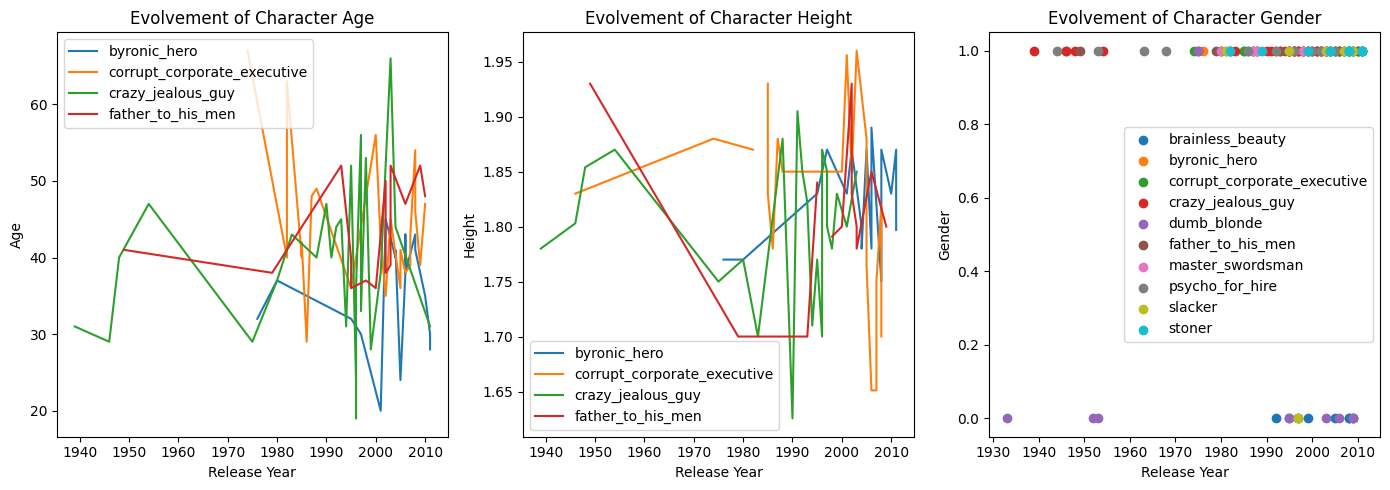

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5))

# Character age evolvement 
for group, data in tvtropes_character_filtered_grouped:
    data = data.sort_values('Release_year')
    data['Actor_gender'] = data['Actor_gender'].apply(lambda x: 1 if x == 'M' else 0)
    data = data[data['Release_year'] != 0]
    ax3.scatter(data['Release_year'], data['Actor_gender'], label=group)
    if group in ['crazy_jealous_guy', 'byronic_hero', 'corrupt_corporate_executive', 'father_to_his_men']:
        ax1.plot(data['Release_year'], data['Actor_age'], label=group)
        ax2.plot(data['Release_year'], data['Actor_height'], label=group)

ax1.legend()
ax1.set_xlabel('Release Year')
ax1.set_ylabel('Age')
ax1.set_title('Evolvement of Character Age')

ax2.legend()
ax2.set_xlabel('Release Year')
ax2.set_ylabel('Height')
ax2.set_title('Evolvement of Character Height')

ax3.legend()
ax3.set_xlabel('Release Year')
ax3.set_ylabel('Gender')
ax3.set_title('Evolvement of Character Gender')


plt.tight_layout()
plt.show()